# Contour Plot of ASV
*Akira Di Sandro, 6/25/20*
<br>
In this notebook, I will be making a contour plot of the ASV (along strait velocity) using Marion's file 'SolomonStrait_westernXsection_linear2bot_sat4surf.mat'.

## 1. Load in Data

In [8]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import random

In [1]:
from scipy.io import loadmat
x = loadmat('SolomonStrait_westernXsection_linear2bot_sat4surf.mat')

## 2. Save Data into variables

In [24]:
#along strait velocity saved in 255x99x590 matrix (depth x points along cross section x timestamps)
asv = x['ASV']

#lon: lon points along cross section, lat (same as lon), xdist: distance from start of cross section
lon = x['bathy'][0][0][2][0]
lat = x['bathy'][0][0][3][0]
xdist = x['bathy'][0][0][4][0]
points = np.arange(99)

#raw_time: datenums associated to each day mooring data was taken
raw_time = x['time'][0]

#depth: array of all the depths possible
depth = x['z']

Convert datenum to timestamps python can understand.

In [9]:
# this code reads matlab datenums and returns it in a datetime vector. 
def matlab2datetime(matlab_datenum):
    day = dt.datetime.fromordinal(int(matlab_datenum))
    dayfrac = dt.timedelta(days=matlab_datenum%1) - dt.timedelta(days = 366)
    return day + dayfrac

In [12]:
times = []

for time in raw_time:
    times = np.concatenate([times, [matlab2datetime(int(time))]])

In [25]:
asv[:][:][0]

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.37691869, -0.35513538, -0.31889705, ..., -0.42223409,
        -0.42243779, -0.41531144],
       ...,
       [ 0.01539843,  0.01400987,  0.01225329, ...,  0.03512788,
         0.03109504,  0.02653325],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

## 3. Attempt first plot
I'm taking a snapshot of time to do a contour plot of ASV.

In [55]:
# change nan's to zeros (?) for now
time0 = asv[:][:][0]
nan_in_time0 = np.isnan(time0)
time0[nan_in_time0] = 0
time0

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.37691869, -0.35513538, -0.31889705, ..., -0.42223409,
        -0.42243779, -0.41531144],
       ...,
       [ 0.01539843,  0.01400987,  0.01225329, ...,  0.03512788,
         0.03109504,  0.02653325],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

TypeError: Illegal arguments to pcolormesh; see help(pcolormesh)

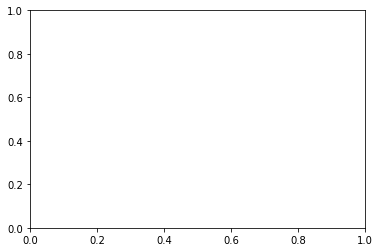

In [57]:
plt.pcolormesh([points, depth], asv[:][:][0])
# i have to make sure the nan's are numbers that the pcolor can process

In [ ]:
help

In [48]:
print(asv[:][:][0])

[[        nan         nan         nan ...         nan         nan
          nan]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.37691869 -0.35513538 -0.31889705 ... -0.42223409 -0.42243779
  -0.41531144]
 ...
 [ 0.01539843  0.01400987  0.01225329 ...  0.03512788  0.03109504
   0.02653325]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [        nan         nan         nan ...         nan         nan
          nan]]


In [46]:
def test_pcolor_datetime_axis():
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.4, top=0.98, bottom=.15)
    base = dt.datetime(2013, 1, 1)
    x = np.array([base + dt.timedelta(days=d) for d in range(21)])
    y = np.arange(21)
    z1, z2 = np.meshgrid(np.arange(20), np.arange(20))
    z = z1 * z2
    print(z)
    plt.subplot(221)
    plt.pcolor(x[:-1], y[:-1], z)
    plt.subplot(222)
    plt.pcolor(x, y, z)
    x = np.repeat(x[np.newaxis], 21, axis=0)
    y = np.repeat(y[:, np.newaxis], 21, axis=1)
    plt.subplot(223)
    plt.pcolor(x[:-1, :-1], y[:-1, :-1], z)
    plt.subplot(224)
    plt.pcolor(x, y, z)
    #plt.colorbar()
    for ax in fig.get_axes():
        for label in ax.get_xticklabels():
            label.set_ha('right')
            label.set_rotation(30) 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
   18  19]
 [  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
   36  38]
 [  0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51
   54  57]
 [  0   4   8  12  16  20  24  28  32  36  40  44  48  52  56  60  64  68
   72  76]
 [  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
   90  95]
 [  0   6  12  18  24  30  36  42  48  54  60  66  72  78  84  90  96 102
  108 114]
 [  0   7  14  21  28  35  42  49  56  63  70  77  84  91  98 105 112 119
  126 133]
 [  0   8  16  24  32  40  48  56  64  72  80  88  96 104 112 120 128 136
  144 152]
 [  0   9  18  27  36  45  54  63  72  81  90  99 108 117 126 135 144 153
  162 171]
 [  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
  180 190]
 [  0  11  22  33  44  55  66  77  88  99 110 121 132 143 154 165

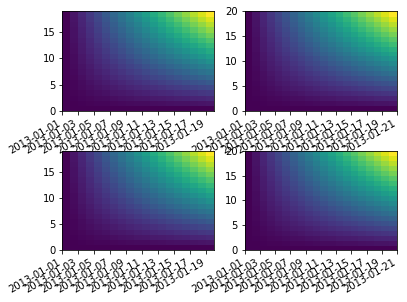

In [47]:
test_pcolor_datetime_axis()